## 1 - Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2 - Configurações Gerais

In [2]:
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

## 3 - Importação de Base Tratada

In [4]:
df = pd.read_csv("C:/Users/paulo/OneDrive/Área de Trabalho/APS_4sem/data/desmatamento_tratado.csv")

df.head()

,year,month,area,uf,classname,numpol
0,2019,8,5.20,PA,MINERACAO,58
1,2015,8,1.96,AM,MINERACAO,15
2,2015,8,0.20,MT,MINERACAO,2
3,2015,8,11.86,PA,MINERACAO,101
4,2015,9,0.11,AM,MINERACAO,1


## 4 - Visão dos Dados

In [5]:
df.info()
df.describe(include='all')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1069 non-null   int64  
 1   month      1069 non-null   int64  
 2   area       1069 non-null   float64
 3   uf         1069 non-null   object 
 4   classname  1069 non-null   object 
 5   numpol     1069 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 50.2+ KB


year         0
month        0
area         0
uf           0
classname    0
numpol       0
dtype: int64

## 5 - Análise Geral - Distribuição da Área Desmatada

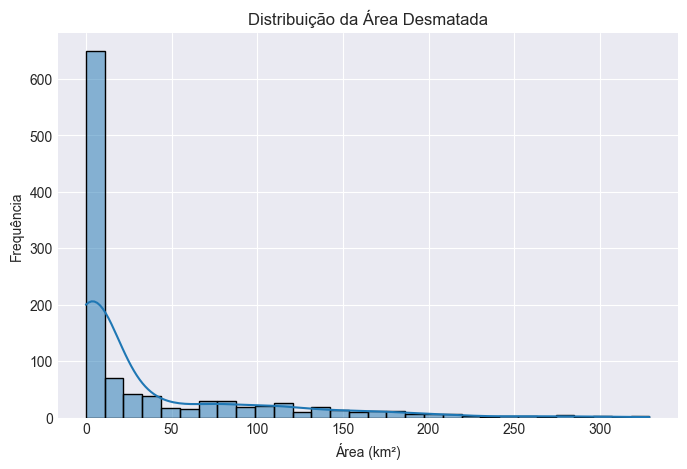

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['area'], bins=30, kde=True)
plt.title('Distribuição da Área Desmatada')
plt.xlabel('Área (km²)')
plt.ylabel('Frequência')
plt.show()

## 6 - Desmatamento por Estado

C:\Users\paulo\AppData\Local\Temp\ipykernel_8044\2405629630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='uf', y='area', palette='viridis')


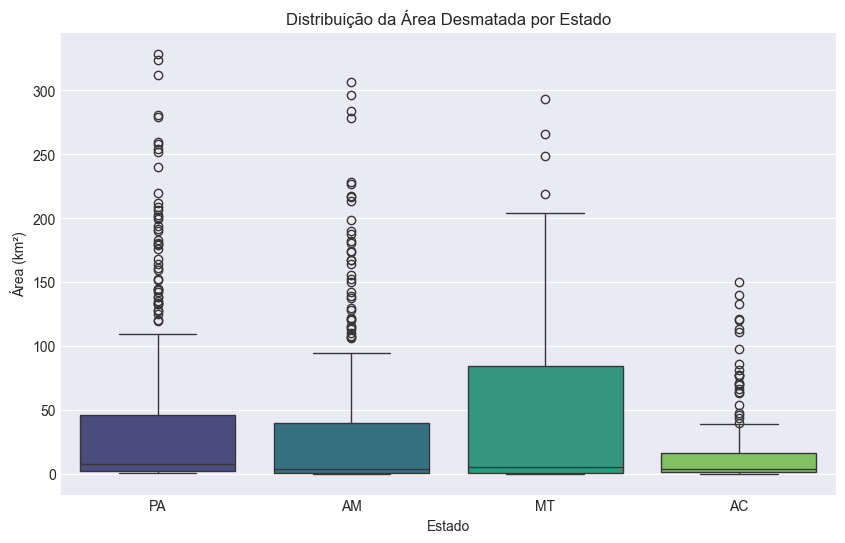

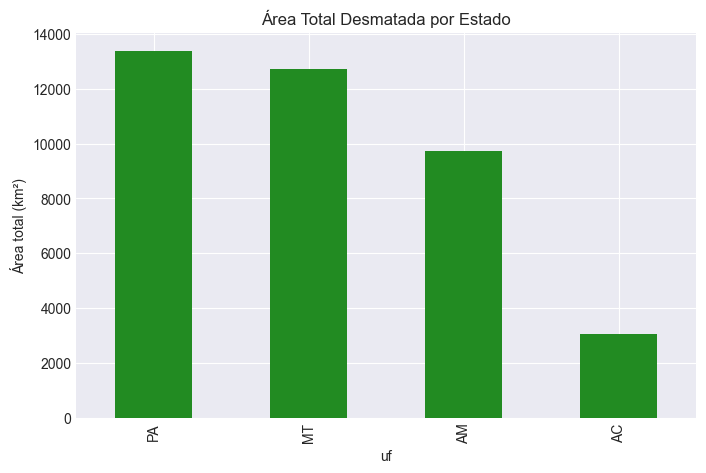

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='uf', y='area', palette='viridis')
plt.title('Distribuição da Área Desmatada por Estado')
plt.xlabel('Estado')
plt.ylabel('Área (km²)')
plt.show()

# Total anual por estado
area_estado = df.groupby('uf')['area'].sum().sort_values(ascending=False)
area_estado.plot(kind='bar', figsize=(8,5), color='forestgreen')
plt.title('Área Total Desmatada por Estado')
plt.ylabel('Área total (km²)')
plt.show()


## 7 - Desmatamento ao Longo do Tempo

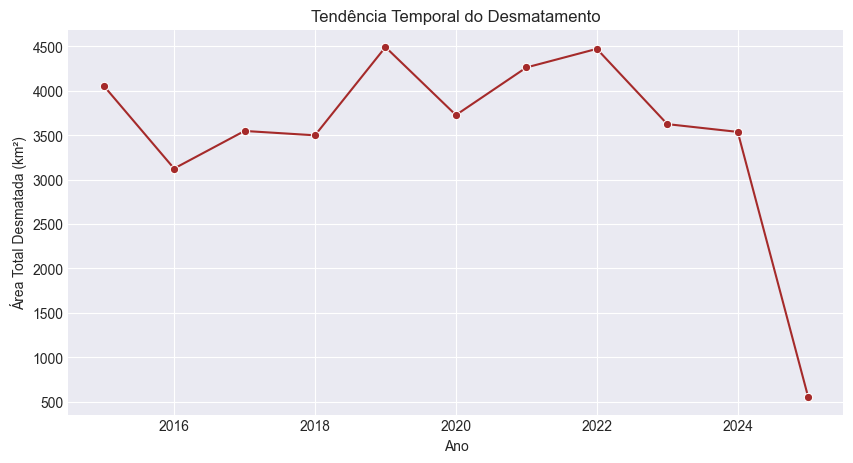

In [8]:
area_ano = df.groupby('year')['area'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=area_ano, x='year', y='area', marker='o', color='brown')
plt.title('Tendência Temporal do Desmatamento')
plt.xlabel('Ano')
plt.ylabel('Área Total Desmatada (km²)')
plt.show()

## 8 - Desmatamento por Mês (Sazonalidade)

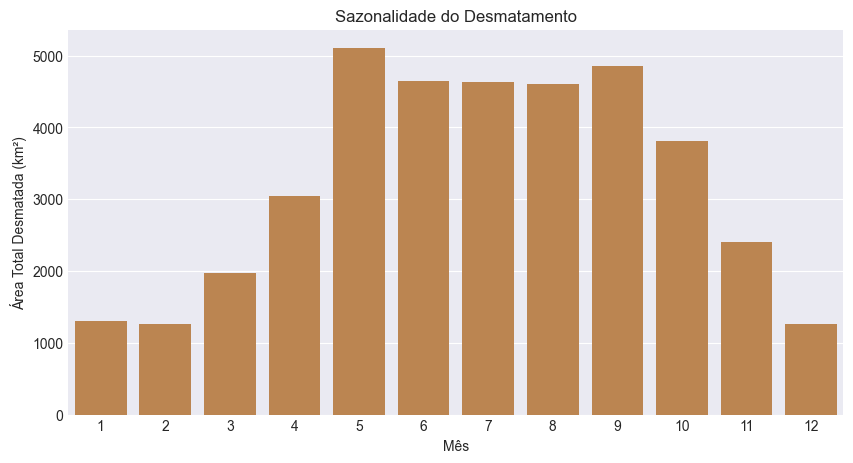

In [9]:
area_mes = df.groupby('month')['area'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=area_mes, x='month', y='area', color='peru')
plt.title('Sazonalidade do Desmatamento')
plt.xlabel('Mês')
plt.ylabel('Área Total Desmatada (km²)')
plt.show()


## 9 - Classes de Desmatamento

C:\Users\paulo\AppData\Local\Temp\ipykernel_8044\1714846003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=classe_area, x='classname', y='area', palette='mako')


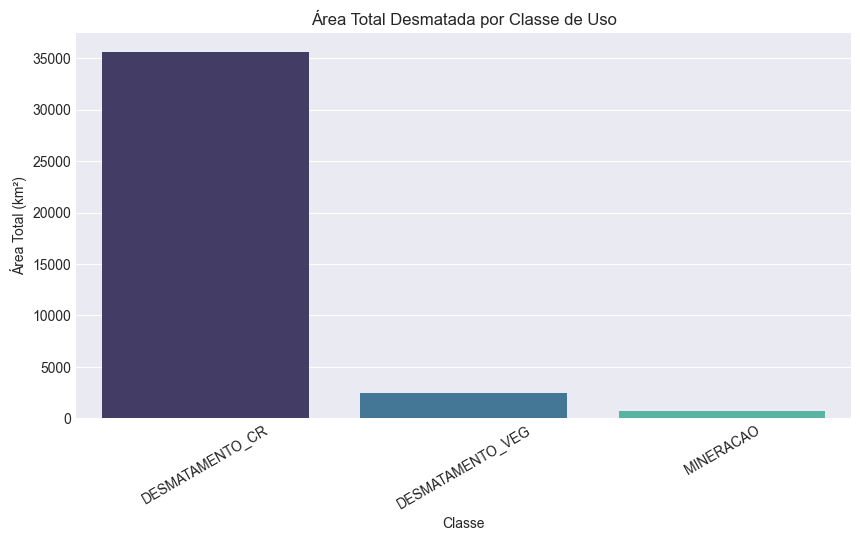

In [10]:
classe_area = df.groupby('classname')['area'].sum().reset_index().sort_values(by='area', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=classe_area, x='classname', y='area', palette='mako')
plt.title('Área Total Desmatada por Classe de Uso')
plt.xlabel('Classe')
plt.ylabel('Área Total (km²)')
plt.xticks(rotation=30)
plt.show()

## 10 - Correlações

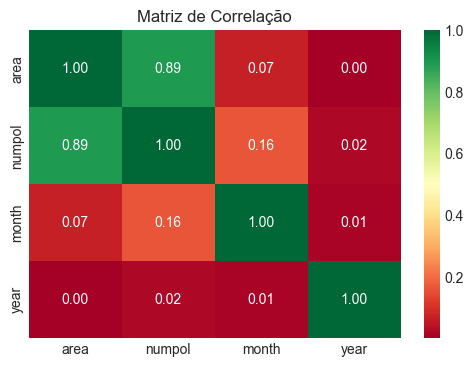

In [11]:
corr = df[['area', 'numpol', 'month', 'year']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

## 11 - Insight para o Streamlit

In [13]:
resumo_estatistico = df.groupby(['year', 'uf'])['area'].sum().reset_index()
resumo_estatistico.to_csv("C:/Users/paulo/OneDrive/Área de Trabalho/APS_4sem/datadesmatamento_resumo.csv", index=False)
print("✅ Arquivo resumo salvo em data/base/desmatamento_resumo.csv")

✅ Arquivo resumo salvo em data/base/desmatamento_resumo.csv
